In [1]:
# Checking the Data Sets 
# Check the data if it good for balancing
import os
import fnmatch

def count_images(directory):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp', '*.tiff']
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for ext in image_extensions:
            image_count += len(fnmatch.filter(files, ext))
    return image_count

fake_resume_dir = 'Fake Resume'
real_resume_dir = 'Real Resume'
fake_resume = count_images(fake_resume_dir)
real_resume  = count_images(real_resume_dir)
print(f'Total fake Resume in directory: {fake_resume}')
print(f'Total Real Resume in directory: {real_resume}')


Total fake Resume in directory: 1562
Total Real Resume in directory: 1527


In [2]:
# Docxs CLeaner
import os

def delete_docx_files(folder_path):
    # List all files in the specified directory
    for filename in os.listdir(folder_path):
        # Check if the file ends with .docx
        if filename.endswith('.docx'):
            file_path = os.path.join(folder_path, filename)
            try:
                os.remove(file_path)  # Delete the file
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# Specify the folder path
folder_path = 'Real Resume'  # Replace with your folder path
delete_docx_files(folder_path)


In [3]:
import os
import cv2
import numpy as np

def calculate_average_pixel_size(directory):
    # Get list of all images in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith(('jpg', 'jpeg', 'png', 'bmp'))]
    
    if not image_files:
        print("No images found in the directory.")
        return None

    total_width = 0
    total_height = 0
    count = 0

    for image_file in image_files:
        # Read the image
        img = cv2.imread(os.path.join(directory, image_file))
        
        # Get the dimensions of the image
        height, width = img.shape[:2]

        # Accumulate width and height
        total_width += width
        total_height += height
        count += 1

    # Calculate average width and height
    average_width = total_width / count
    average_height = total_height / count

    return average_width, average_height

# Specify the directory containing images
fake_path = 'Fake Resume'  # Replace with your image directory path
real_path = 'Real Resume'   # Replace with your image directory path

# Calculate the average pixel size
fake_average_size = calculate_average_pixel_size(fake_path)
real_average_size = calculate_average_pixel_size(real_path)

# Display the average sizes
if fake_average_size is not None:
    print(f"Average size of Fake Resume images: {fake_average_size[0]:.2f}x{fake_average_size[1]:.2f}")

if real_average_size is not None:
    print(f"Average size of Real Resume images: {real_average_size[0]:.2f}x{real_average_size[1]:.2f}")


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Average size of Fake Resume images: 768.47x1000.00
Average size of Real Resume images: 1003.45x1717.86


In [2]:
import os
import nltk
import cv2
import pandas as pd
import string
from nltk.corpus import stopwords
import pytesseract

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to extract text from image
def extract_text_from_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Use Tesseract to do OCR on the image
    text = pytesseract.image_to_string(gray)
    return text

# Load data from directories
def load_data(real_resumes_dir, fake_resumes_dir):
    data = []
    labels = []

    # Load real resumes
    for filename in os.listdir(real_resumes_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            text = extract_text_from_image(os.path.join(real_resumes_dir, filename))
            data.append(text)
            labels.append(1)  # Label for real resume

    # Load fake resumes
    for filename in os.listdir(fake_resumes_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            text = extract_text_from_image(os.path.join(fake_resumes_dir, filename))
            data.append(text)
            labels.append(0)  # Label for fake resume

    return pd.DataFrame({'text': data, 'label': labels})

# Load your dataset
real_resumes_dir = 'Real Resume'
fake_resumes_dir = 'Fake Resume'
data = load_data(real_resumes_dir, fake_resumes_dir)

# Function to clean extracted text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply cleaning function
data['cleaned_text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /home/wonka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [3]:
# Save the DataFrame to a CSV file
data.to_csv('resume_data.csv', index=False)

# Save the DataFrame to a pickle file
data.to_pickle('resume_data.pkl')


In [4]:
# Load the DataFrame from a CSV file
#data = pd.read_csv('resume_data.csv')
# Load the DataFrame from a pickle file
# data = pd.read_pickle('resume_data.pkl')


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       298
           1       1.00      0.96      0.98       319

    accuracy                           0.98       617
   macro avg       0.98      0.98      0.98       617
weighted avg       0.98      0.98      0.98       617



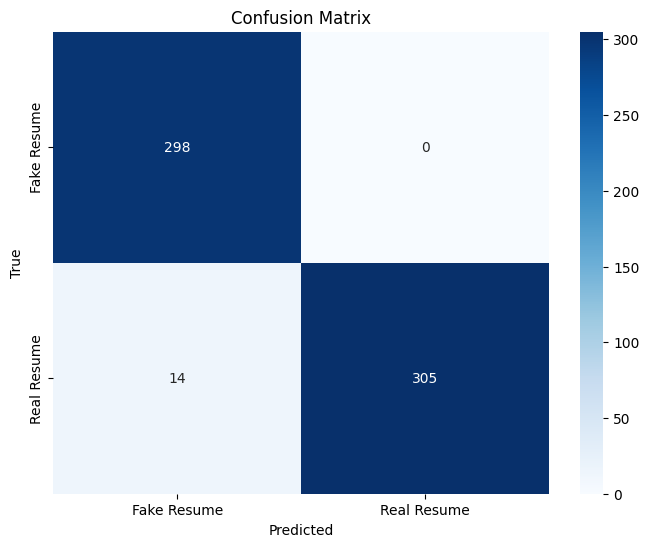

<Figure size 1000x600 with 0 Axes>

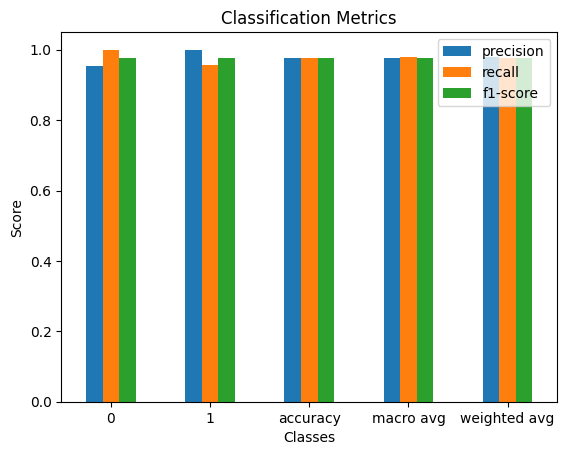

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Load the data (example)
data = pd.read_csv('resume_data.csv')

# Fill missing values in 'cleaned_text' with an empty string
data['cleaned_text'] = data['cleaned_text'].fillna('')

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake Resume', 'Real Resume'], yticklabels=['Fake Resume', 'Real Resume'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plotting the Classification Report Metrics
report = classification_report(y_test, y_pred, output_dict=True)
metrics = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', legend=True)
plt.title('Classification Metrics')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.xlabel('Classes')
plt.show()


In [4]:
# Check Word Frequency from collections import Counter
from collections import Counter

# Combine all cleaned text into one large string
all_text = ' '.join(data['cleaned_text'])

# Split the text into individual words
words = all_text.split()

# Count word frequencies
word_freq = Counter(words)

# Get the top 100 most common words
common_words = word_freq.most_common(20)

# Separate words and their frequencies for plotting
words, frequencies = zip(*common_words)


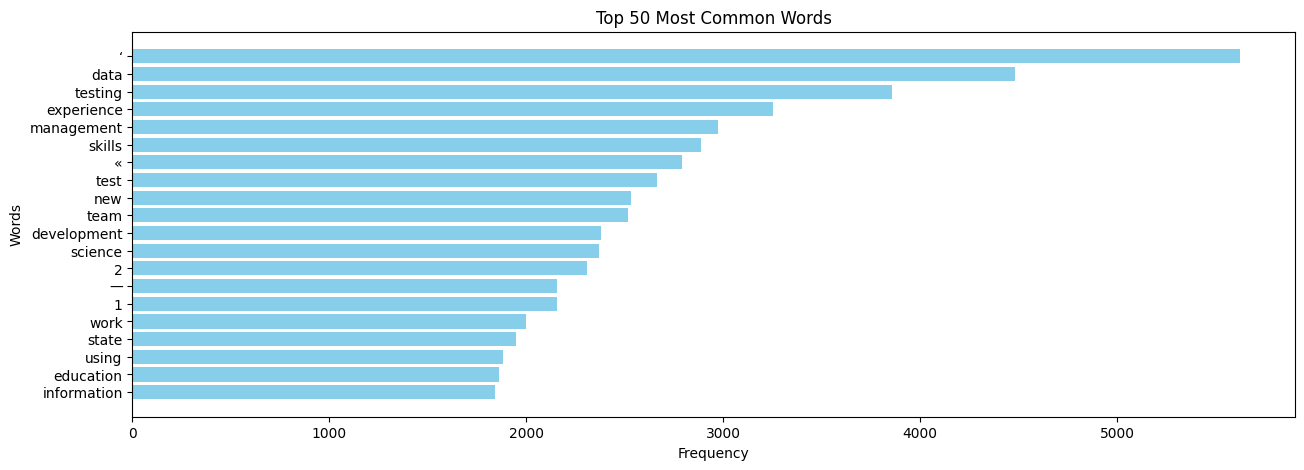

In [6]:
# Plot the top 100 most common words
plt.figure(figsize=(15, 5))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Common Words')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency word on top
plt.show()

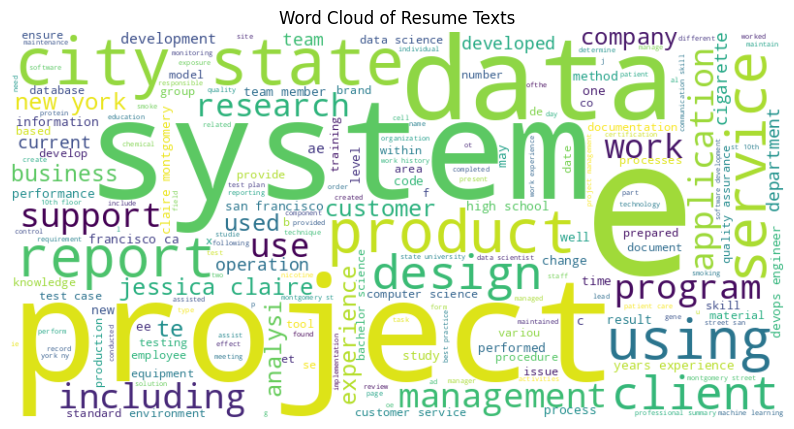

In [7]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Resume Texts')
plt.show()

In [11]:
import joblib

# Save the model to a file
joblib.dump(model, 'resume_classifier_model.pkl')

# Save the vectorizer as well
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [1]:
import os
import PyPDF2
import joblib

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        # Iterate through all pages
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

# Function to clean the extracted text
def clean_text(text):
    # Implement your text cleaning logic here
    cleaned_text = text.lower()  # Example: Lowercase the text
    return cleaned_text

# Load the pre-trained model and vectorizer
model = joblib.load("First Gen/resume_classifier_model.pkl")
vectorizer = joblib.load("First Gen/tfidf_vectorizer.pkl")

# Define the directory containing PDF resumes
pdf_directory = "Test"

# List all PDF files in the directory
new_resume_pdfs = [os.path.join(pdf_directory, f) for f in os.listdir(pdf_directory) if f.endswith('.pdf')]

# Loop over each resume PDF
for pdf_path in new_resume_pdfs:
    # Extract text from the PDF
    new_resume_text = extract_text_from_pdf(pdf_path)
    
    # Clean the extracted text
    new_resume_text_cleaned = clean_text(new_resume_text)
    
    # Transform the cleaned text using the same TF-IDF vectorizer used during training
    new_resume_vector = vectorizer.transform([new_resume_text_cleaned])
    
    # Predict whether the new resume is real (1) or fake (0)
    prediction = model.predict(new_resume_vector)[0]  # Get the predicted label (0 or 1)
    probability = model.predict_proba(new_resume_vector)[0]  # Get the prediction probabilities
    
    # Print the results for each resume
    print(f"Processing: {pdf_path}")
    
    if prediction == 1:
        print("The resume is real.")
    else:
        print("The resume is fake.")
    
    # Print the prediction probability for each resume
    print(f"Prediction probability: {probability}\n")


Processing: Test/Empty Dir.pdf
The resume is fake.
Prediction probability: [0.82038723 0.17961277]

Processing: Test/RESUME-Macalanda.pdf
The resume is real.
Prediction probability: [0.43096497 0.56903503]

Processing: Test/Takdang Aralalin 6.pdf
The resume is fake.
Prediction probability: [0.85516377 0.14483623]

Processing: Test/Black & White Minimalistic Professional Resume.pdf
The resume is real.
Prediction probability: [0.34768939 0.65231061]

Processing: Test/Resume - Aaron Gil Rubinos_1.pdf
The resume is real.
Prediction probability: [0.31078482 0.68921518]

Processing: Test/Resume-JULIAN-MIGUEL-AVILA.pdf
The resume is real.
Prediction probability: [0.17881789 0.82118211]

Processing: Test/Blue Simple Professional CV Resume.pdf
The resume is real.
Prediction probability: [0.32452987 0.67547013]

Processing: Test/RESUME_EDWARD-ANGEL.pdf
The resume is fake.
Prediction probability: [0.68216242 0.31783758]

Processing: Test/Minimalist Modern Professional CV Resume.pdf
The resume is 

In [14]:
import joblib

# Save the model
joblib.dump(model, 'resume_classifier_model.pkl')

# Load the model
loaded_model = joblib.load('resume_classifier_model.pkl')

# Use the loaded model to make predictions
new_prediction = loaded_model.predict(new_resume_vector)
